In [12]:
import pandas as pd
import numpy as np
# Load the dataset from a CSV file
df = pd.read_csv("C:\Personal\Internship\Datasets\Housing.csv")

# Display the first few rows of the DataFrame
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  


## Task 3

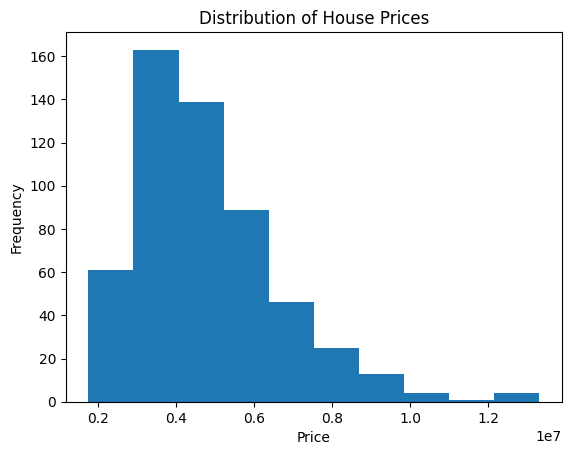

In [6]:
import matplotlib.pyplot as plt

# Univariate analysis - Histogram
plt.hist(df['price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


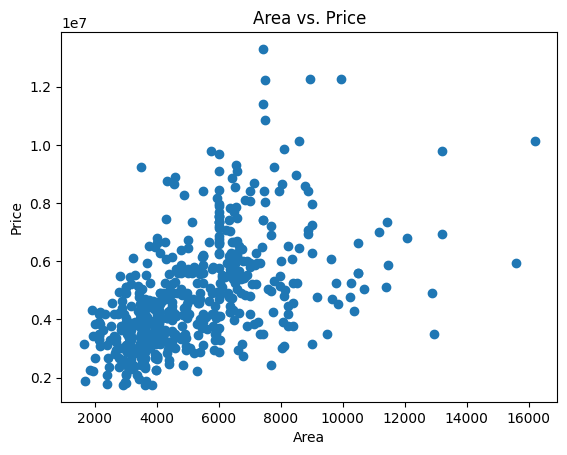

In [8]:
# Bivariate analysis - Scatter plot
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price')
plt.show()

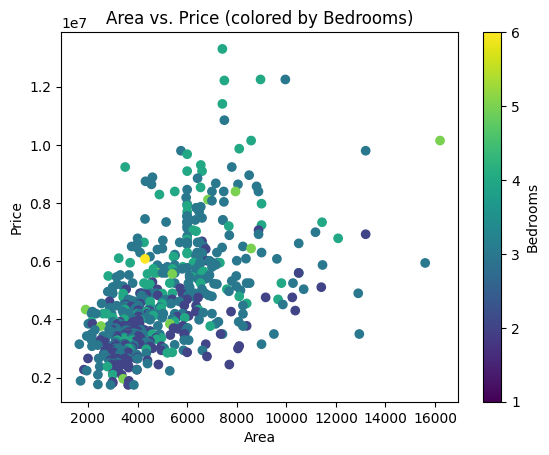

In [7]:
# Multivariate analysis - Scatter plot with different colors
plt.scatter(df['area'], df['price'], c=df['bedrooms'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price (colored by Bedrooms)')
plt.colorbar(label='Bedrooms')
plt.show()


## Task 4

In [9]:
# Calculate descriptive statistics
descriptive_stats = df.describe()
# Display the descriptive statistics
print(descriptive_stats)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


## Task 5

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Deal with missing values
# Option 1: Remove rows with missing values
df_cleaned = df.dropna()

# Option 2: Fill missing values with mean, median, or mode
# For example, fill missing values in the 'bedrooms' column with the median
median_bedrooms = df['bedrooms'].median()
df['bedrooms'].fillna(median_bedrooms, inplace=True)

# Display the updated DataFrame
print(df.head())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  


## Task 6

In [13]:
# Define a function to detect and replace outliers using the Z-score method
def replace_outliers_zscore(data, column, threshold):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    outliers = np.abs(z_scores) > threshold
    data.loc[outliers, column] = data[column].mean()

# Specify the threshold for outlier detection (e.g., 3)
threshold = 3

# Apply the outlier detection and replacement for each numerical column
numerical_columns = df.select_dtypes(include=np.number).columns
for column in numerical_columns:
    replace_outliers_zscore(df, column, threshold)

# Display the updated DataFrame
print(df.head())

          price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0  4.766729e+06  7420.0       4.0   2.000000      3.0      yes        no   
1  4.766729e+06  8960.0       4.0   1.286239      4.0      yes        no   
2  4.766729e+06  9960.0       3.0   2.000000      2.0      yes        no   
3  4.766729e+06  7500.0       4.0   2.000000      2.0      yes        no   
4  4.766729e+06  7420.0       4.0   1.000000      2.0      yes       yes   

  basement hotwaterheating airconditioning  parking furnishingstatus  
0       no              no             yes      2.0        furnished  
1       no              no             yes      3.0        furnished  
2      yes              no              no      2.0   semi-furnished  
3      yes              no             yes      3.0        furnished  
4      yes              no             yes      2.0        furnished  


## Task 7

In [14]:
# Check for categorical columns
categorical_columns = df.select_dtypes(include='object').columns
print(categorical_columns)

# Perform one-hot encoding using pandas get_dummies() function
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the encoded DataFrame
print(df_encoded.head())

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')
          price    area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0  4.766729e+06  7420.0       4.0   2.000000      3.0      2.0        False   
1  4.766729e+06  8960.0       4.0   1.286239      4.0      3.0        False   
2  4.766729e+06  9960.0       3.0   2.000000      2.0      2.0        False   
3  4.766729e+06  7500.0       4.0   2.000000      2.0      3.0        False   
4  4.766729e+06  7420.0       4.0   1.000000      2.0      2.0        False   

   mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0          True          True          False         True         False   
1          True          True          False         True         False   
2          True          True          False        False          True   
3          True          True          False        False          True   
4          True   

## Task 8

In [15]:
# Split the data into dependent and independent variables
X = df.drop('price', axis=1)  # Independent variables (features)
y = df['price']  # Dependent variable (target)

# Display the independent variables (features)
print(X.head())

# Display the dependent variable (target)
print(y.head())

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  7420.0       4.0   2.000000      3.0      yes        no       no   
1  8960.0       4.0   1.286239      4.0      yes        no       no   
2  9960.0       3.0   2.000000      2.0      yes        no      yes   
3  7500.0       4.0   2.000000      2.0      yes        no      yes   
4  7420.0       4.0   1.000000      2.0      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes      2.0        furnished  
1              no             yes      3.0        furnished  
2              no              no      2.0   semi-furnished  
3              no             yes      3.0        furnished  
4              no             yes      2.0        furnished  
0    4.766729e+06
1    4.766729e+06
2    4.766729e+06
3    4.766729e+06
4    4.766729e+06
Name: price, dtype: float64


## Task 9

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Split the data into dependent and independent variables
X = df.drop('price', axis=1)  # Independent variables (features)
y = df['price']  # Dependent variable (target)

# Perform one-hot encoding on categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from X
X = X.drop(categorical_cols, axis=1)

# Concatenate the encoded categorical columns with the remaining independent variables
X = pd.concat([X, X_encoded], axis=1)

# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled independent variables
print(X_scaled)


[[ 1.04672629  1.40341936  1.42181174 ...  1.4726183  -0.84488844
  -0.6964292 ]
 [ 1.75700953  1.40341936  5.40580863 ...  1.4726183  -0.84488844
  -0.6964292 ]
 [ 2.21823241  0.04727831  1.42181174 ... -0.67906259  1.18358821
  -0.6964292 ]
 ...
 [-0.70592066 -1.30886273 -0.57018671 ... -0.67906259 -0.84488844
   1.43589615]
 [-1.03338891  0.04727831 -0.57018671 ... -0.67906259 -0.84488844
  -0.6964292 ]
 [-0.5998394   0.04727831 -0.57018671 ... -0.67906259 -0.84488844
   1.43589615]]


c:\Users\ashri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Task 10

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (436, 12)
X_test shape: (109, 12)
y_train shape: (436,)
y_test shape: (109,)


## Task 11

In [26]:
from sklearn.linear_model import LinearRegression
# Create an instance of the LinearRegression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Predict the target variable for the test data
y_pred = model.predict(X_test)


## Task 12

In [28]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the scaled training data
model.fit(X_train, y_train)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 548109.29707758   72106.73426106  529825.73993768  349907.07444447
  196251.91221138  172044.53901546  106273.91956178  232216.32247376
  131725.95938097  369964.77373229  -65643.1351995  -199925.35805096]
Intercept: 4735754.496363989


## Task 13

In [29]:
# Predict on the test data
y_pred = model.predict(X_test)

# Compare the predicted values with the actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the comparison dataframe
print(comparison)


      Actual     Predicted
316  4060000  5.258926e+06
77   6650000  6.718131e+06
360  3710000  3.206391e+06
90   6440000  4.746637e+06
493  2800000  3.417109e+06
..       ...           ...
15   9100000  5.243868e+06
357  3773000  4.403494e+06
39   7910000  7.188076e+06
54   7350000  6.560681e+06
155  5530000  5.956203e+06

[109 rows x 2 columns]


## Task 14

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 1837637189871.7078
Root Mean Squared Error (RMSE): 1355594.7734746204
R-squared Score: 0.636440468663946
